In [1]:
#basic package
import os
import numpy as np
import pandas as pd
import time
import datetime as dt
import sys

#plot
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
PACKAGE_PARENT = '../'
SCRIPT_DIR = os.path.dirname(os.path.realpath(os.path.join(os.getcwd(), os.path.expanduser('__file__'))))
sys.path.append(os.path.normpath(os.path.join(SCRIPT_DIR, PACKAGE_PARENT)))
from UTILS import is_day, findDay, is_day, is_WG_open
import config_origins as config

C:\Users\camil\anaconda3\lib\site-packages\scipy\sparse\sparsetools.py:21: DeprecationWarning: `scipy.sparse.sparsetools` is deprecated!
scipy.sparse.sparsetools is a private module for scipy.sparse, and should not be used.
  _deprecated()


2


# Define parameters

In [3]:
print('change the configuration file if not done yet!')
path_extracted_data = config.path_extracted_data
id_run = config.id_run
dico_garden_opening_hour = config.dico_garden_opening_hour
date_first_opening_WG = config.date_first_opening_WG
close_dates = config.close_dates
dico_night_hour = config.dico_night_hour
max_date_adaptability = config.max_date_adaptability
path_extracted_data_visual_adap = os.path.join(path_extracted_data,'Adaptability')

change the configuration file if not done yet!


C:\Users\camil\anaconda3\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


## Understand the data visually

In [4]:
li_date = list(pd.date_range(start = dt.datetime(2020,9,30), end = max_date_adaptability, freq = 'D'))
li_hours = list(range(0,24))

C:\Users\camil\anaconda3\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [5]:
#light mngt
li_df = []
for d in li_date:
    dico_ = {h:int(is_day(dt.datetime(d.year,d.month,d.day,h,0,0),dico_night_hour)) for h in li_hours}
    dico_['date'] = dt.datetime.date(d)
    li_df.append(dico_)
df_light = pd.DataFrame(li_df)
print(df_light.shape)
df_light.head(3)

(54, 25)


C:\Users\camil\anaconda3\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,date
0,0,0,0,0,0,0,0,0,0,1,...,1,1,0,0,0,0,0,0,0,2020-09-30
1,0,0,0,0,0,0,0,0,0,1,...,1,1,1,0,0,0,0,0,0,2020-10-01
2,0,0,0,0,0,0,0,0,0,1,...,1,1,1,0,0,0,0,0,0,2020-10-02


In [6]:
#wg mngt
li_df = []
for d in li_date:
    dico_ = {h:int(is_WG_open(dt.datetime(d.year,d.month,d.day,h,0,0), dico_garden_opening_hour, date_first_opening_WG, 
                              close_dates, epsi_open=0, epsi_close=0)) for h in li_hours}
    dico_['date'] = dt.datetime.date(d)
    li_df.append(dico_)
df_wg = pd.DataFrame(li_df)
print(df_wg.shape)
df_wg.head(3)

(54, 25)


C:\Users\camil\anaconda3\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,date
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2020-09-30
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2020-10-01
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2020-10-02


C:\Users\camil\anaconda3\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


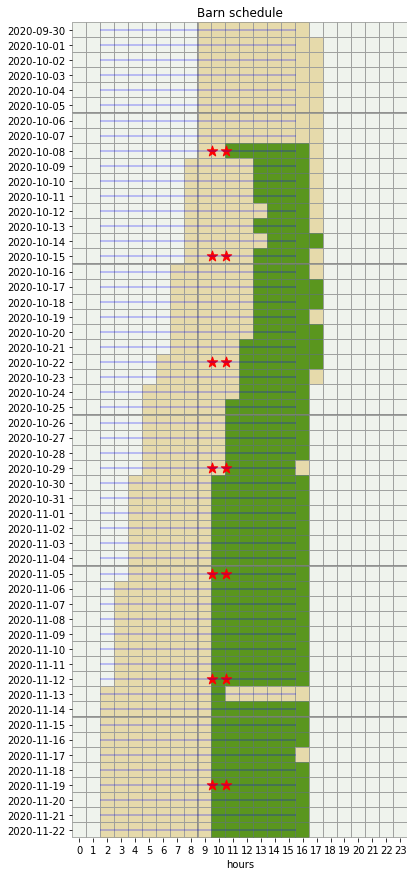

In [7]:
###################### plot schedule of: light, wg, nestbox, cleaning (always on Thursdays)
#light schedule
fig = plt.figure(figsize=(6,15))
ax = sns.heatmap(df_light[li_hours].to_numpy(), xticklabels=li_hours, yticklabels=df_light['date'].tolist(), 
                 cbar=False, cmap=sns.light_palette("goldenrod", as_cmap=True), alpha=0.8)

#add wintergarten opening
sns.heatmap(df_wg[li_hours].to_numpy(), xticklabels=li_hours, yticklabels=df_wg['date'].tolist(), 
            cbar=False, cmap=sns.light_palette("green", as_cmap=True), alpha=0.6, ax=ax, 
            linecolor='grey',linewidths=.1)

#add nestbox opening indicated by a line
ax.hlines(y=[i+0.5 for i in range(0,len(df_wg['date'].tolist()))], xmin=2, xmax=16, color='blue', alpha=0.3)

#add barn cleaning: every thursday from 10h to 11 except the first thrsday
#choose marker from: https://matplotlib.org/stable/api/markers_api.html#module-matplotlib.markers)
li_thursday_index = [li_date.index(d)+0.5 for d in li_date if findDay(d)=='Thursday'][1:] #remove first one as did not happened
ax.scatter([10 for i in range(len(li_thursday_index))], li_thursday_index, marker='*', s=120, color='red') #s = size
ax.scatter([11 for i in range(len(li_thursday_index))], li_thursday_index, marker='*', s=120, color='red') #s = size

plt.title('Barn schedule')
plt.xlabel('hours')
#high dpi to avoid pixel issues (in between lines of different width)
plt.savefig(os.path.join(path_extracted_data_visual_adap,'MngtLight.png'),dpi=700,format='png',bbox_inches='tight')
plt.show()

C:\Users\camil\anaconda3\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


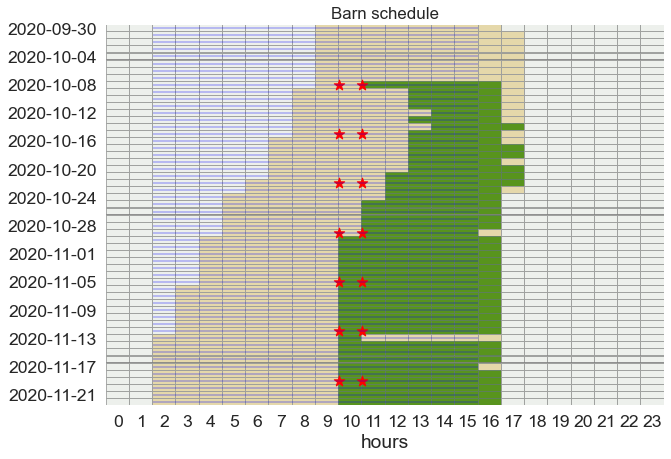

In [21]:
###################### plot schedule of: light, wg, nestbox, cleaning (always on Thursdays)
#light schedule
fig = plt.figure(figsize=(10,7))
ax = sns.heatmap(df_light[li_hours].to_numpy(), xticklabels=li_hours, yticklabels=df_light['date'].tolist(), 
                 cbar=False, cmap=sns.light_palette("goldenrod", as_cmap=True), alpha=0.8)
sns.set(font_scale=1.4)
#add wintergarten opening
sns.heatmap(df_wg[li_hours].to_numpy(), xticklabels=li_hours, 
            yticklabels=[df_wg['date'].tolist()[i] if i%4==0 else ' ' for i in range(0,len(df_wg['date'].tolist()))], 
            cbar=False, cmap=sns.light_palette("green", as_cmap=True), alpha=0.6, ax=ax, 
            linecolor='grey',linewidths=.1)

#add nestbox opening indicated by a line
ax.hlines(y=[i+0.5 for i in range(0,len(df_wg['date'].tolist()))], xmin=2, xmax=16, color='blue', alpha=0.3)

#add barn cleaning: every thursday from 10h to 11 except the first thrsday
#choose marker from: https://matplotlib.org/stable/api/markers_api.html#module-matplotlib.markers)
li_thursday_index = [li_date.index(d)+0.5 for d in li_date if findDay(d)=='Thursday'][1:] #remove first one as did not happened
ax.scatter([10 for i in range(len(li_thursday_index))], li_thursday_index, marker='*', s=120, color='red') #s = size
ax.scatter([11 for i in range(len(li_thursday_index))], li_thursday_index, marker='*', s=120, color='red') #s = size

plt.title('Barn schedule')
plt.xlabel('hours')
#high dpi to avoid pixel issues (in between lines of different width)
plt.savefig(os.path.join(path_extracted_data_visual_adap,'MngtLight_M.png'),dpi=700,format='png',bbox_inches='tight')
plt.show()